In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

import thinkbayes
from thinkbayes import Pmf
from thinkbayes import Suite
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# 공산과 가산
___
## 1. 공산

- **$공산^{odds}$**은 확률과 동일한 정보를 다르게 표기하는 법으로 아래와 같이 설명할 수 있음
```python
def Odds(p):
    return p / (1-p)
```
- 이길 확률이 75%라면 이길 가능성이 질 가능성의 3배이므로 "odds are 3:1" 이라고 표기 가능
- 반대의 경우 통상적으로 "odds against are 3:1" 이라고 표기
- 역으로 공산을 확률로 변경할 때에는 다음과 같이 설명 가능
```python
def  Probability(o):
    return o / (1+o)
```

___
## 2. 베이즈 이론의 공산 형태

- 베이즈 이론은 아래와 같은 확률 형태로 표기 가능
$$
p(H\ |\ D) = \frac{p(H)\ p(D\ |\ H)}{p(D)}
$$
<br>
- $A$와 $B$ 라는 상호 배제적인 가설이 있을 때 사후 확률 비는 아래와 같이 표기 가능
$$
\frac{p(A\ |\ D)}{p(B\ |\ D)} = \frac{p(A)\ p(D\ |\ A)}{p(B)\ p(D\ |\ B)}
$$
<br>
- 위 사후 공산식($o(A\ |\ D)$)을 정리하면 아래와 같이 표기 가능
$$
o(A) = \frac{p(A)}{p(1-A)}\\
o(A\ |\ D) = o(A)\frac{p(D\ |\ A)}{p(D\ |\ (1-A))}
$$
- 즉 사후공산은 **사전공산($o(A)$)**과 **우도비($\frac{p(D\ |\ A)}{p(D\ |\ (1-A)}$)**의 곱으로 표기 가능
- 위 계산을 쿠키 문제에 대입하면 다음과 같음
> 쿠키 그릇 1에는30개의 바닐라 쿠키와 10개의 초콜렛 쿠키가 있고, 그릇 2에는 각각 20개씩 있음  
> ```{'Bowl 1': {'vanila': 0.75, 'chocolate': 0.25}, 'Bowl 2': {'vanila': 0.5, 'chocolate':0.5}} ```  
> 우도비 $\frac{p(D\ |\ A)}{p(D\ |\ (1-A)} = \frac{3/4}{1/2} = 1.5$  
>  
> 랜덤으로 쿠키 1개를 골랐을 때  쿠키를 그릇 1에서 골랐을 확률은?  
> 사전공산 $o(A) = 0.5 / (1-0.5) = 1$
>  
> 사후공산 $o(A\ |\ D)$는 $3:2$, 사후 확률 $p(A\ |\ D)$는 $3/5$로 정리 가능

___
## 3. 올리버의 혈액형

>-  범죄현장에서 O형과 AB형 혈흔이 발견됨
>- O형은 인구의 60% 빈도로, AB형은 인구의 1%빈도로 나타남
>- 용의자 올리버의 혈액형은 O형
>- 위 데이터가 올리버가 법인 중 한명이라는 질문의 증거가 될 수 있을까?

- 쿠키 문제에서 사전 공산은 1:1, 확률은 50%, 사후 공산은 3:2, 확률은 60%임
- 따라서, 바닐라 쿠키는 그릇 1에서 나온 가설에 대한 증거라고 할 수 있음
- $\frac{o(A\ |\ D)}{o(A)} = \frac{p(D\ |\ A)}{p(D\ |\ B}$ 를 **베이즈 요인(Bayes facter)** 라고 함
- 사후공산과 사전 공산의 비, 혹은 우도비로 베이즈요인이 1보다 크면, 데이터는 A가정에 더 가깝다고 해석할 수 있음

>- 올리버가 범인일 시 데이터의 확률은 임의의 'AB'형 혈액을 가진 사람의 확률과 동일 $= 0.01$
>- 올리버가 범인이 아닐 시, 데이터의 확률은 2개의 샘플에서 각각 한명이 'O'형이고 한명이 'AB일 확률과 동일 $2 * (0.6)*(0.01) = 0.012$
>- 후자의 우도가 더 높으므로, 데이터는 범인다는 가설에 반증이 될 수 있음

___
## 4. 가산
- 베이지안 통계의 기본 연산은 Update에서 사전분포와 데이터를 가지고 사후 분포를 생성하는 것임
- 다만, 실제 문제에서는 정규화 덧셈, 최대값 등 다양한 수치 연산을 포함
- 본 페이지에서는 덧셈과 최대값에 대하여 설명

>- *던전 앤 드래곤*에서는 게임 시작 전 6면체 주사위 3개를 굴린 후 이 값으로 캐릭터의 속성값을 결정
>- 이때 3개의 주사위의 합의 분포는?

- 이를 계산할 수 있는 방법은 두가지가 있음  
    **1. 시뮬레이션**  
    하나의 Pmf가 주어졌을 때 이를 사용해서 랜덤 샘플을 만들어서 분포를 구함  
    **2. 나열**  
    모든 경우의 수를 나열하고 이 합의 분포를 구함

In [2]:
class Die(thinkbayes.Pmf):
    def __init__(self, sides):
        thinkbayes.Pmf.__init__(self)
        for x in range(1, sides+1):
            self.Set(x, 1)
        self. Normalize()

In [3]:
d6 = Die(6)

In [4]:
dice = [d6]*3
dice

#### 1. 시뮬레이션
- ```SampleSum```은 분포 리스트와 샘플 크기 n을 사용
```python
def SampleSum(dists, n):
    pmf = MakePmfFromList(RandomSum(dists) for i in range(n))
    return pmf
```
- ```SampleSum```은 ```RandomSum```을 사용
```python
def RandomSum(dists):
    total = sum(dist.Random() for dist in dists)
    return total
```
- n개의 시뮬레이션 값을 생성한 후 이 분포를 Pmf 객체로 반환
- 시뮬레이션의 문제점은 결과가 근사값을 보여줄 뿐 정확하지는 않음

In [5]:
three = thinkbayes.SampleSum(dice, 1000)
three.d

{3: 0.004,
 4: 0.014,
 5: 0.023,
 6: 0.049,
 7: 0.07200000000000001,
 8: 0.096,
 9: 0.10400000000000001,
 10: 0.121,
 11: 0.11800000000000001,
 12: 0.14,
 13: 0.093,
 14: 0.078,
 15: 0.044,
 16: 0.032,
 17: 0.008,
 18: 0.004}

#### 2. 나열
- 모든 값의 쌍을 나열하고 각 쌍의 확률을 계산하는 방법은 `Pmf.__add__`에 구현
```python
# class Pmf
    def __add__(self, other):
    for v1, p1 in self.Items():
        for v2, p2 in other.Items():
            pmf.Incr(v1+v2, p1*p2)
    return pmf
```
- 함수를 사용하는 방식은 단순히 pmf 객체를 더하여 사용

In [6]:
three_exact = d6 + d6 + d6
three_exact.d

{3: 0.004629629629629629,
 4: 0.013888888888888888,
 5: 0.027777777777777776,
 6: 0.046296296296296294,
 7: 0.06944444444444445,
 8: 0.09722222222222222,
 9: 0.11574074074074073,
 10: 0.125,
 11: 0.125,
 12: 0.11574074074074074,
 13: 0.09722222222222224,
 14: 0.06944444444444445,
 15: 0.046296296296296294,
 16: 0.027777777777777776,
 17: 0.013888888888888888,
 18: 0.004629629629629629}

Text(0.5,1,'approximation and real pmf for three 6-side dice roll\n')

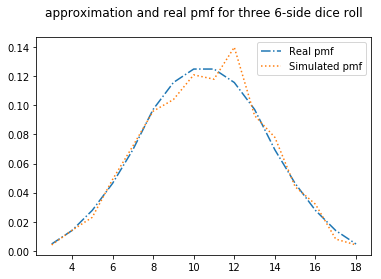

In [7]:
pd.Series(three_exact.d, index = three_exact.d.keys()).plot(ls = '-.', label = 'Real pmf')
pd.Series(three.d, index = three.d.keys()).sort_index().plot(ls = ':', label = 'Simulated pmf')
plt.legend()
plt.title('approximation and real pmf for three 6-side dice roll\n')

- 단, `Pmf.__add__`는 각 Pmf로부터 랜덤섬택이 독립적이라는 가정하에서 만들어짐

___
## 5. 최대값

- 케릭터 생성에 있어서는 최고 속성이 중요함
- 따라서 속성의 최대값 분포만 따로 확인
- 이를 계산하는 방법은 세가지가 있음  
    **1. 시뮬레이션**  
    Pmf를 사용한 랜덤 샘플링을 통해 최대값 분포 누적  
    **2. 나열**  
    모든 경우의 수를 나열하여 최대값을 분포 계산  
    **3. 멱법(Exponentiation)**  
    Pmf를 Cdf로 바꿀 때 최대값에서 Cdf를 구하는 알고리즘 사용

#### 1. 시뮬레이션
- 최대값을 시뮬레이션하는 코드는 합을 시뮬레이션하는 코드와 거의 동일
```python
def RandomMax(dists):
    total = max(dist.Random() for dist in dists)
    return total
def SampleMax(dists, n):
    pmf = MakePmfFromList(RandomMax(dists) for i in range(n))
    return pmf
```

#### 2. 나열
- 나열 역시 마찬가지로 for문 안의 첫번째 변수값만 조정해 주면 됨
```python
def PmfMax(pmf1, pmf2):
  res = thinkbayes.Pmf()
  for v1, p1 in pmf1.Items():
      for v2, p2 in pmf2.Items():
          res.Incr(max(v1, v2), p1*p2)
  return res
```
- 다만, 위 함수는 실행 시간이 Pmf가 m개의 값을 가질 때 실행시간이 $m^2$에 비례함
- 만약 $k$개중 최대값을 찾으려한다면 $km^2$만큼의 시간 소요

#### 3. 멱법(exponentiation)
- Pmf를 Cdf로 변경하면 동일한 계산을 훨씬 빠르게 가능  
    $CDF(x) = p(X \le x)$
    
    
- 이때, $CDF_1(X)$, $CDF_2(Y)$, Z=max(X,Y)일 때 Z가 5 이하인 경우는 다음 식이 성립함 (X,Y 독립시)  
    $CDF_3(Z) = CDF_1(X)CDF_2(Y)$  
    
    
- 만일 CDF의 분포가 같다면, 다음과 같은 식이 성립  
    $CDF_k(Z) = CDF_1(Z)^k$


- thinkbayes의 Cdf 클래스는 위의 기능을 아래와 같이 구현
```python
#class Cdf
    def Max(self, k):
        cdf = self.Copy()
        cdf.ps = [p*k for p in cdf.ps]
        return cdf
```
- `Pmf.Max()`도 유사한 기능을 수행하나 Pmf에서 Cdf로 변환하는 추가작업 시간이 필요
- 이하 캐릭터의 최고 속성값의 분포를 계산하는 예

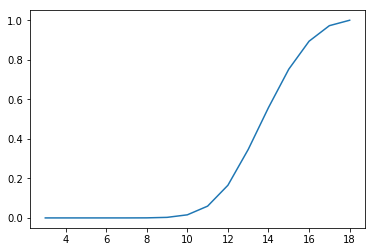

In [8]:
## Pmf를 Cdf로 전환하여 최대값의 분포 계산
best_attr_cdf = three_exact.Max(6)
pd.Series(best_attr_cdf.ps, index = range(3,19)).plot()

Text(0.5,1,'distribution of maximum value from 6 3-rice rolls\n ')

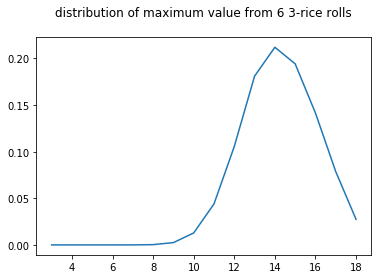

In [9]:
## Cdf를 Pmf로 재전환
best_attr_pmf = best_attr_cdf.MakePmf()
pd.Series(best_attr_pmf.d, index = range(3, 19)).plot()
plt.title('distribution of maximum value from 6 3-rice rolls\n ')

In [10]:
best_attr_pmf.d[18]

0.027458253422613543

In [11]:
three_exact.d[18]

0.004629629629629629

- 주사위를 3개 던졌을 때 최대값이 나올 확률은 0.4%
- 주사위를 3개 던지는 활동을 6번(속성 수) 할 때 적어도 한번 최대값이 나올 확률은 2.7%

___
## 6. 혼합

- 주사위의 종류가 다양한 경우 결과 값의 분포 역시 당연히 달라짐
> #### [4면체(5개), 6면체(4개), 8면체(3개), 12면체(2개), 20면체(1개)] 총5개의 주사위 중 하나를 골라서 굴리는 경우의 분포

- 어떤 주사위라 굴려진지 모르기 때문에 결과 분포는 서로 다른 범위의 균등분포의 혼합 형태로 나타남
- 이는 단순한 수학적 모델로 설명할 순 없지만, Pmf 형태로 분포를 계산할 수 있음

- 6면체와 8면체 두개의 주사위만 있는 간단한 버전의 문제로 시작

In [12]:
d6 = Die(6)
d8 = Die(8)

- 혼합 형태를 나타내는 Pmf 생성
- 2중 반복문을 사용하여 첫번째 반복에서 주사위를 나열하고, 두번째 반복에서 결과와 확률을 나열
- 두번째 반복에서 Incr 메서드로 분포의 결과를 합산

In [13]:
mix = thinkbayes.Pmf()
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize()
mix.d

{1: 0.14583333333333334,
 2: 0.14583333333333334,
 3: 0.14583333333333334,
 4: 0.14583333333333334,
 5: 0.14583333333333334,
 6: 0.14583333333333334,
 7: 0.06250000000000001,
 8: 0.06250000000000001}

Text(0.5,1,'Pmf of dice-roll[6,8]\n')

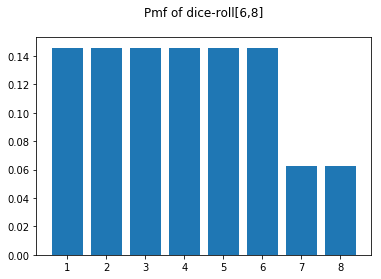

In [14]:
plt.bar(x = list(mix.d.keys()), height = pd.Series(mix.d))
plt.title('Pmf of dice-roll[6,8]\n')

- 위 예제와는 다르게 실제 문제에서는 각 주사위의 확률이 동일하지 않음
- 각 결과에 가중치를 부여하여 주사위의 선택 확률 보정

In [35]:
pmf_dice = thinkbayes.Pmf()
for i, j  in [(4,5), (6,4), (8,3), (12,2), (20,1)]:    #### i = 면체, j = 가중치(갯수)
    for outcome, prob in Die(i).Items():
        for k in range(j):
            pmf_dice.Incr(outcome, prob)
pmf_dice.Normalize()
pmf_dice.d

{1: 0.1672222222222222,
 2: 0.1672222222222222,
 3: 0.1672222222222222,
 4: 0.1672222222222222,
 5: 0.08388888888888883,
 6: 0.08388888888888883,
 7: 0.03944444444444443,
 8: 0.03944444444444443,
 9: 0.014444444444444439,
 10: 0.014444444444444439,
 11: 0.014444444444444439,
 12: 0.014444444444444439,
 13: 0.0033333333333333322,
 14: 0.0033333333333333322,
 15: 0.0033333333333333322,
 16: 0.0033333333333333322,
 17: 0.0033333333333333322,
 18: 0.0033333333333333322,
 19: 0.0033333333333333322,
 20: 0.0033333333333333322}

Text(0.5,1,'Pmf of dice-roll[6,8] with weight\n')

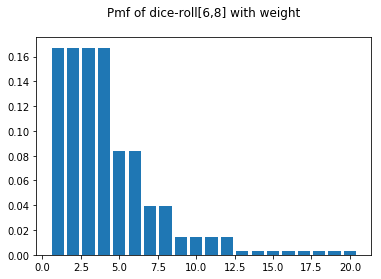

In [36]:
plt.bar(x = list(pmf_dice.d.keys()), height = pd.Series(pmf_dice.d))
plt.title('Pmf of dice-roll[6,8] with weight\n')

- 모든 주사위에서 값이 나올 수 있는 1~4는 가장 높은 확률을 보임 16.7%
- 주사위 1개에서만 나올 수 있는 12 이상의 값은 거의 나올 확률이 없음 0.3%